In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [18]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [34]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("Threecars.csv")  
mpg_df

,Price,Age,Mileage,Porsche,Jaguar,BMW
0,69.4,3,21.5,1,0,0
1,56.9,3,43.0,1,0,0
2,49.9,2,19.9,1,0,0
3,47.4,4,36.0,1,0,0
4,42.9,4,44.0,1,0,0
...,...,...,...,...,...,...
85,26.9,6,68.1,0,0,1
86,30.0,6,46.8,0,0,1
87,36.0,5,46.8,0,0,1
88,38.0,4,36.1,0,0,1


In [28]:
# Check top few records to get a feel of the data structure
mpg_df.iloc[:,1:]

,Price,Age,Mileage,Porsche,Jaguar,BMW
0,69.4,3,21.5,1,0,0
1,56.9,3,43.0,1,0,0
2,49.9,2,19.9,1,0,0
3,47.4,4,36.0,1,0,0
4,42.9,4,44.0,1,0,0
...,...,...,...,...,...,...
85,26.9,6,68.1,0,0,1
86,30.0,6,46.8,0,0,1
87,36.0,5,46.8,0,0,1
88,38.0,4,36.1,0,0,1


In [4]:
# drop the car name column as it is useless for the model
mpg_df = mpg_df.drop('car_name', axis=1)

In [5]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


In [32]:
mpg_df.dtypes

Price      float64
Age          int64
Mileage    float64
Porsche      int64
Jaguar       int64
BMW          int64
dtype: object

In [35]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('Price', axis=1)
# X = X.drop({'origin_america', 'origin_asia' ,'origin_europe'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['Price']]


In [36]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [25]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [26]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.8637178336269842
The coefficient for disp is 0.01006605075500309
The coefficient for hp is -0.03922900629589685
The coefficient for wt is -0.006414996525192756
The coefficient for acc is 0.011723809488666803
The coefficient for yr is 0.7588184849759373
The coefficient for car_type is 6.626521339249247


In [28]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -26.693360125832097


In [29]:

regression_model.score(X_train, y_train)

0.825809118133759

In [30]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.8404952015294237

In [31]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [32]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()


,cyl,disp,hp,wt,acc,yr,car_type,mpg
350,4,105.0,63.0,2215,14.9,81,1,34.7
59,4,97.0,54.0,2254,23.5,72,1,23.0
120,4,121.0,112.0,2868,15.5,73,1,19.0
12,8,400.0,150.0,3761,9.5,70,0,15.0
349,4,91.0,68.0,1985,16.0,81,1,34.1


In [37]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    90 non-null     float64
 1   Age      90 non-null     int64  
 2   Mileage  90 non-null     float64
 3   Porsche  90 non-null     int64  
 4   Jaguar   90 non-null     int64  
 5   BMW      90 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 4.3 KB


In [38]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Price ~ Age+Mileage+Porsche+Jaguar+BMW', data = mpg_df).fit()
lm1.params

Intercept    45.748646
Age          -0.763526
Mileage      -0.462333
Porsche      25.644514
Jaguar        6.599498
BMW          13.504634
dtype: float64

In [39]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     75.59
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           3.46e-27
Time:                        21:14:09   Log-Likelihood:                -317.27
No. Observations:                  90   AIC:                             644.5
Df Residuals:                      85   BIC:                             657.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.7486      1.432     31.955      0.0

In [35]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [36]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

3.053810365384958

In [37]:
# so there is avg of 3.0 (roundoff) mpg difference from real mpg on an avg

In [38]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.8404952015294237

In [39]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

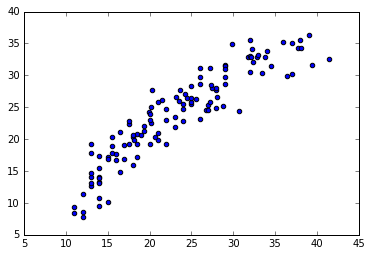

In [40]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['mpg'], y_pred)



In [41]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

In [42]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


In [43]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


In [44]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.39574700059204443
The coefficient for disp is 0.1305719525443736
The coefficient for hp is -0.1870468214328072
The coefficient for wt is -0.6881521871765555
The coefficient for acc is 0.004130471087878909
The coefficient for yr is 0.3556275988085077
The coefficient for car_type is 0.41977090750921264


In [46]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.8520553264366692e-18


In [47]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.8460575288663481

In [48]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [49]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.39235503199736316

In [50]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

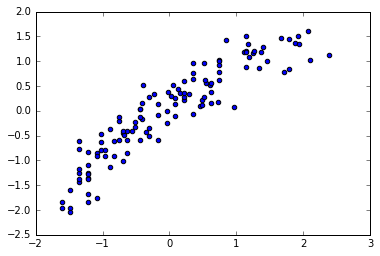

In [51]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['mpg'], y_pred)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [54]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



cyl ---> 172.09167529137474
disp ---> 87.05808335183303
hp ---> 71.23983108333236
wt ---> 139.1665144189037
acc ---> 69.82068667385671
yr ---> 166.95012233353933
car_type ---> 12.993508077923245
